# Import des librairies

dataset: student grades -> validé
1- analyse exploratoire (descriptive)
2- clustering / heatmaps

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import du Dataframe

In [ ]:
df = pd.read_csv('drive/MyDrive/StudentPerformanceFactors.csv')

In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Exploration des données

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Description**

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

**Column Descriptions**

**Hours_Studied**: Number of hours spent studying per week.
Attendance: Percentage of classes attended.

**Parental_Involvement**: Level of parental involvement in the student's education (Low, Medium, High).

**Access_to_Resources**: Availability of educational resources (Low, Medium, High).

**Extracurricular_Activities**: Participation in extracurricular activities (Yes, No).

**Sleep_Hours**: Average number of hours of sleep per night.

**Previous_Scores**: Scores from previous exams.

**Motivation_Level**: Student's level of motivation (Low, Medium, High).

**Internet_Access**: Availability of internet access (Yes, No).

**Tutoring_Sessions**: Number of tutoring sessions attended per month.

**Family_Income**: Family income level (Low, Medium, High).

**Teacher_Quality**: Quality of the teachers (Low, Medium, High).

**School_Type**: Type of school attended (Public, Private).

**Peer_Influence**: Influence of peers on academic performance (Positive, Neutral, Negative).

**Physical_Activity**: Average number of hours of physical activity per week.

**Learning_Disabilities**: Presence of learning disabilities (Yes, No).

**Parental_Education_Level**: Highest education level of parents (High School, College, Postgraduate).

**Distance_from_Home**: Distance from home to school (Near, Moderate, Far).

**Gender**: Gender of the student (Male, Female).

**Exam_Score**: Final exam score.

## Verification des données manquantes

In [ ]:

df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Parental_Education_Level	Distance_from_Home Teacher_Quality

In [ ]:
df.dropna(
    subset=["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"],
    inplace=True,
)

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


# Hakim

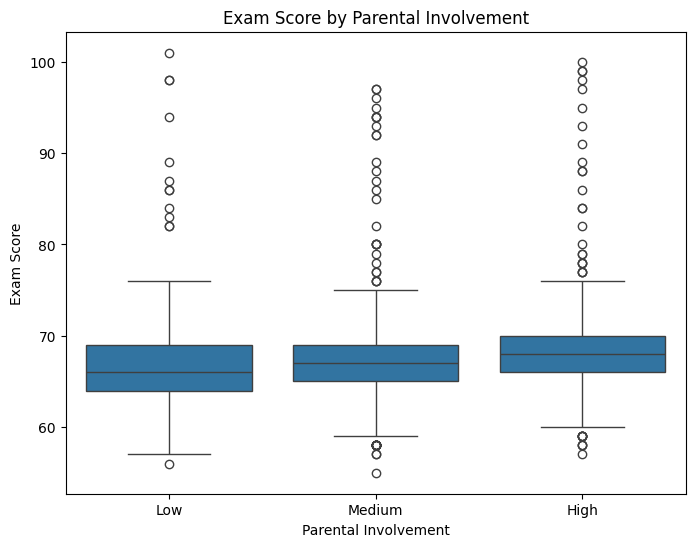

In [ ]:
# @title Exam Score by Parental Involvement

plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
_ = plt.ylabel('Exam Score')

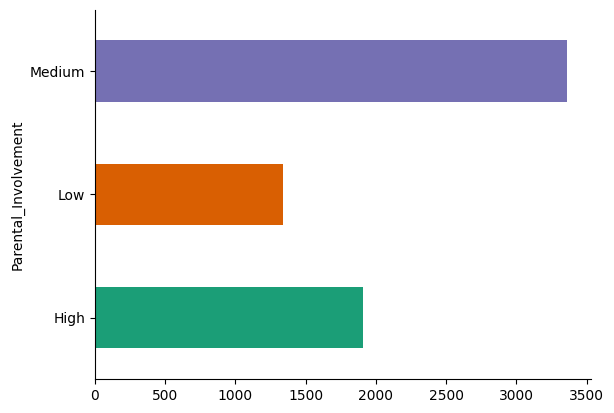

In [ ]:
# @title Parental_Involvement

df.groupby('Parental_Involvement').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

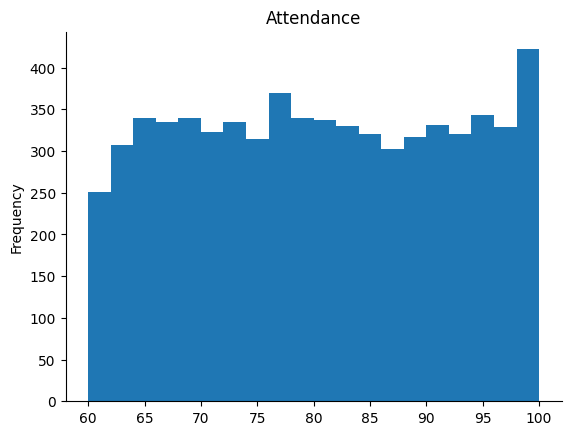

In [ ]:
# @title Attendance

df['Attendance'].plot(kind='hist', bins=20, title='Attendance')
plt.gca().spines[['top', 'right',]].set_visible(False)

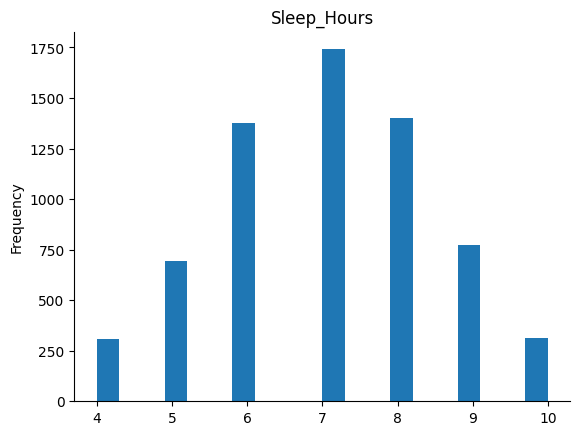

In [ ]:
# @title Sleep_Hours

df['Sleep_Hours'].plot(kind='hist', bins=20, title='Sleep_Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

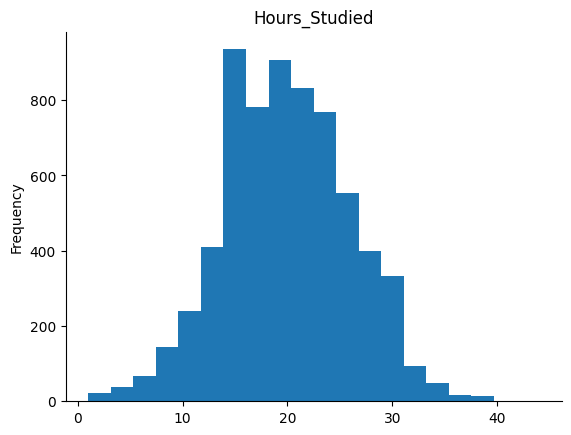

In [ ]:
# @title Hours_Studied

df['Hours_Studied'].plot(kind='hist', bins=20, title='Hours_Studied')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Sk-Learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# @title variables numériques pour le clustering
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                  'Physical_Activity', 'Tutoring_Sessions', 'Exam_Score']

X = df[numeric_columns]

In [ ]:
# @title normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# @title nombre optimal de clusters avec la méthode du coude
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

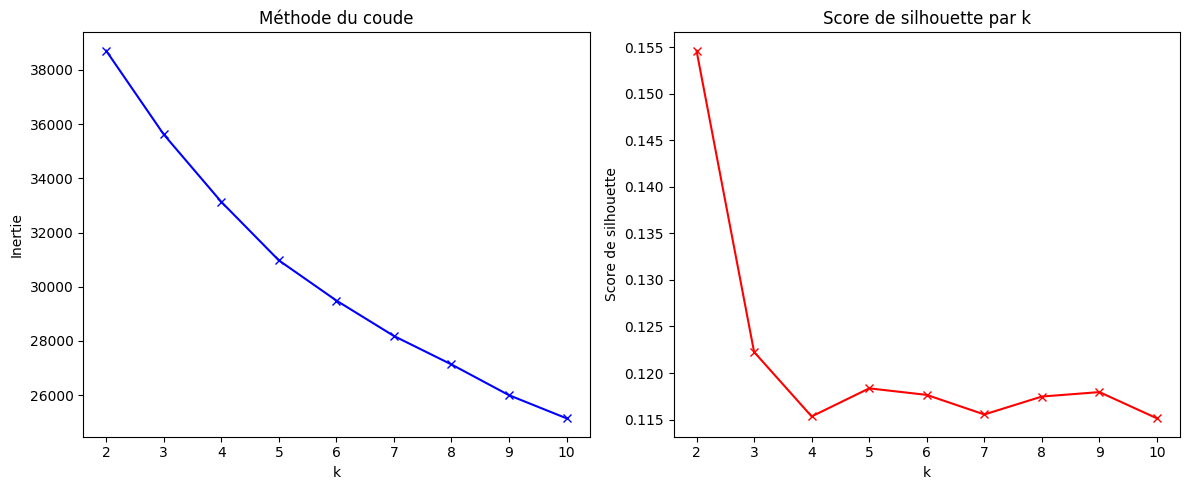

In [ ]:
# @title  courbe du coude
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertie')
plt.title('Méthode du coude')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette par k')
plt.tight_layout()
plt.show()

In [ ]:
# @title appliquer K-means
# avec le nombre optimal de clusters à ajuster selon les résultats du graphique
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# labels des clusters au DataFrame original
df['Cluster'] = clusters

In [ ]:
# @title caractéristiques de chaque cluster
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()
print("\nMoyennes par cluster:")
print(cluster_analysis)


Moyennes par cluster:
         Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Cluster                                                            
0            20.082787   70.356760     7.164979        62.521739   
1            16.714195   91.048162     6.858682        67.093790   
2            25.151946   87.583694     7.083385        81.867820   
3            18.002311   72.102831     7.001733        88.156557   

         Physical_Activity  Tutoring_Sessions  Exam_Score  
Cluster                                                    
0                 3.106611           1.396665   64.357356  
1                 2.805450           1.501267   67.915082  
2                 3.065473           1.731933   71.548487  
3                 2.889081           1.358174   65.374350  


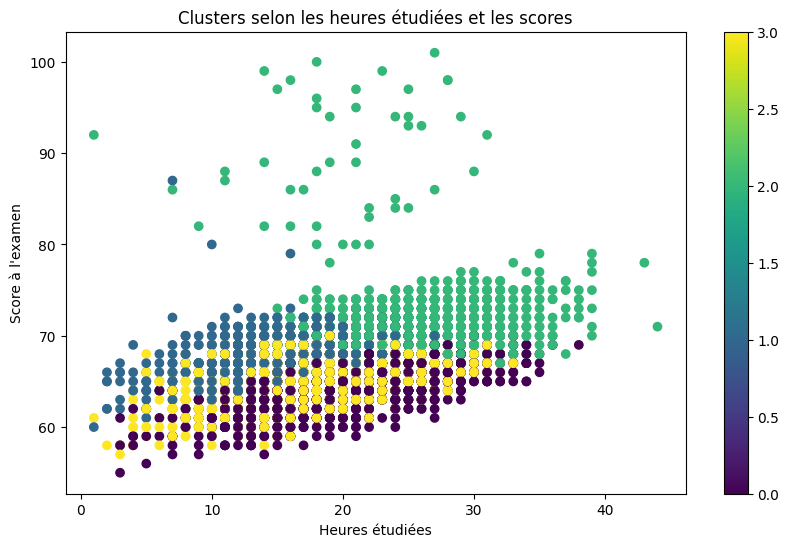

In [ ]:
# @title visualisation des clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Hours_Studied'], df['Exam_Score'],
                     c=clusters, cmap='viridis')
plt.xlabel('Heures étudiées')
plt.ylabel('Score à l\'examen')
plt.title('Clusters selon les heures étudiées et les scores')
plt.colorbar(scatter)
plt.show()

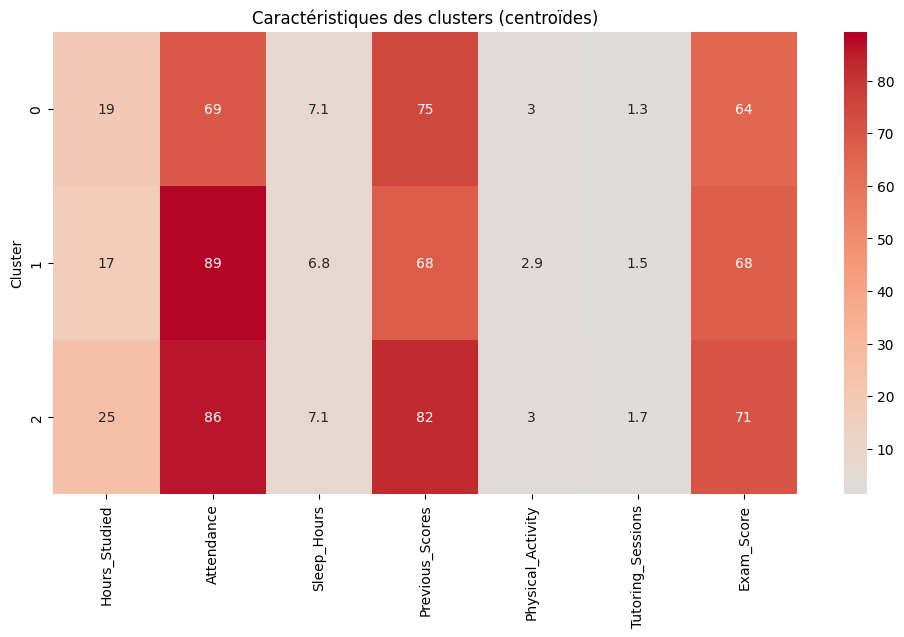

In [ ]:
# @title PCA

# Heatmap des centroïdes
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', center=0)
plt.title('Caractéristiques des clusters (centroïdes)')
plt.show()

# 5.2 Réduction de dimension avec PCA pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame avec composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters